In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ML tools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Function to extract elements from 'centroid' list and assign to new columns
def extract_centroid_elements(sheet):
    sheet['L'] = sheet['centroid'].apply(lambda x: eval(x)[0])
    sheet['A'] = sheet['centroid'].apply(lambda x: eval(x)[1])
    sheet['B'] = sheet['centroid'].apply(lambda x: eval(x)[2])
    sheet['C'] = sheet['centroid'].apply(lambda x: eval(x)[3])
    sheet['H'] = sheet['centroid'].apply(lambda x: eval(x)[4])
    return sheet

In [5]:
excel_data = pd.ExcelFile('Data/kmeans_data_3822.xlsx')

In [6]:
# Load each sheet and extract centroid elements
crom_sheet = excel_data.parse('crom')
crom_sheet = extract_centroid_elements(crom_sheet)
crom_sheet['class'] = 'Crom'

cito_sheet = excel_data.parse('cito')
cito_sheet = extract_centroid_elements(cito_sheet)
cito_sheet['class'] = 'Cito'

glob_sheet = excel_data.parse('glob')
glob_sheet = extract_centroid_elements(glob_sheet)
glob_sheet['class'] = 'Glob'

# Combine the sheets into one DataFrame
combined_df = pd.concat([crom_sheet, cito_sheet, glob_sheet], ignore_index=True)

combined_df.head(5)

,image,centroid,sigma,sigma2,min,max,L,A,B,C,H,class
0,000_seg_000,"[60.208187103271484, 28.140544891357422, -34.2...","[5.0042948722839355, 4.205726623535156, 5.6123...","[10.008589744567871, 8.411453247070312, 11.224...","[49.49547576904297, 16.729331970214844, -48.23...","[71.74944305419922, 38.00669479370117, -22.794...",60.208187,28.140545,-34.262962,28.861353,-34.970840,Crom
1,000_seg_001,"[72.4141616821289, 22.98868179321289, -21.5618...","[5.330959796905518, 4.326024055480957, 5.38736...","[10.661919593811035, 8.652048110961914, 10.774...","[57.53477096557617, 15.112419128417969, -39.29...","[82.566162109375, 34.55077362060547, -12.07593...",72.414162,22.988682,-21.561890,23.672592,-22.186670,Crom
2,000_seg_002,"[62.619171142578125, 32.95601272583008, -40.80...","[5.788082122802734, 4.9921770095825195, 8.2300...","[11.576164245605469, 9.984354019165039, 16.460...","[52.91889572143555, 22.912691116333008, -55.12...","[74.51887512207031, 41.78726577758789, -25.140...",62.619171,32.956013,-40.800350,33.150524,-40.566620,Crom
3,000_seg_003,"[65.55522155761719, 31.18229103088379, -38.181...","[7.1354875564575195, 6.389214515686035, 9.1396...","[14.270975112915039, 12.77842903137207, 18.279...","[47.45114517211914, 20.78822135925293, -68.124...","[79.556884765625, 48.55148696899414, -24.11073...",65.555222,31.182291,-38.181442,32.307858,-39.447372,Crom
4,000_seg_004,"[70.11981201171875, 30.57295036315918, -31.789...","[4.7794365882873535, 5.185969352722168, 6.1621...","[9.558873176574707, 10.371938705444336, 12.324...","[61.77290344238281, 20.698461532592773, -44.18...","[79.66087341308594, 42.16238021850586, -21.208...",70.119812,30.572950,-31.789845,31.114786,-32.575016,Crom


<AxesSubplot: xlabel='L', ylabel='A'>

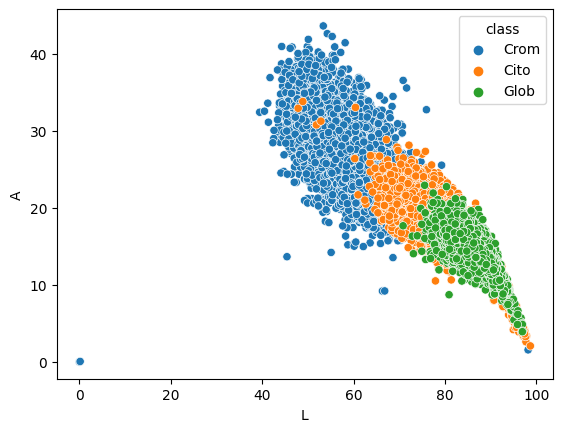

In [7]:
sns.scatterplot(x='L',y='A',data=combined_df,hue='class')

In [8]:
# Usamos para el entrenamiento
features = ['L', 'A','B','C','H']
X = combined_df[features]
y = combined_df['class']

In [9]:
# Veamos las correlaciones
X.corr()

,L,A,B,C,H
L,1.000000,-0.904010,0.942039,-0.784981,0.879180
A,-0.904010,1.000000,-0.920098,0.830792,-0.868545
B,0.942039,-0.920098,1.000000,-0.824921,0.941494
C,-0.784981,0.830792,-0.824921,1.000000,-0.768653
H,0.879180,-0.868545,0.941494,-0.768653,1.000000


In [10]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Split the standardized data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [12]:
# Create and train the Support Vector Machine model on standardized data
svm_model_scaled = svm.SVC(kernel='rbf') # Kernel polinomial
#svm_model_scaled = svm.SVC(kernel='linear')
svm_model_scaled.fit(X_train_scaled, y_train)

SVC()

In [13]:
# Make predictions
y_pred_scaled = svm_model_scaled.predict(X_test_scaled)
#y_pred_scaled

In [14]:
# Generate a classification report
report_scaled = classification_report(y_test, y_pred_scaled, output_dict=True)
pd.DataFrame(report_scaled).transpose()

,precision,recall,f1-score,support
Cito,0.874410,0.801732,0.836495,1155.000000
Crom,0.981233,0.948187,0.964427,1158.000000
Glob,0.835182,0.935226,0.882378,1127.000000
accuracy,0.894767,0.894767,0.894767,0.894767
macro avg,0.896942,0.895048,0.894433,3440.000000
weighted avg,0.897518,0.894767,0.894592,3440.000000


In [15]:
# Generate the confusion matrix
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled, labels=['Crom', 'Cito', 'Glob'])
conf_matrix_scaled

array([[1098,   60,    0],
       [  21,  926,  208],
       [   0,   73, 1054]])

Text(0.5, 1.0, 'Confusion Matrix (Standardized)')

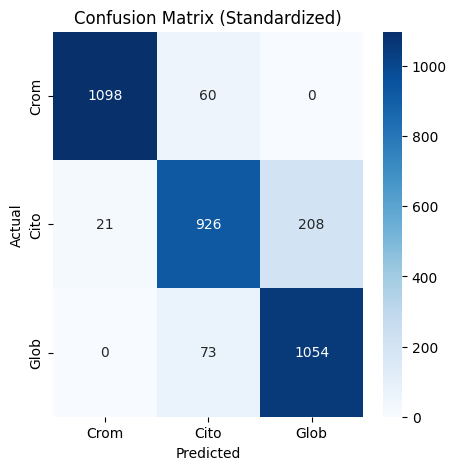

In [16]:
# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_scaled, annot=True, fmt='d', cmap='Blues', xticklabels=['Crom', 'Cito', 'Glob'], yticklabels=['Crom', 'Cito', 'Glob'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Standardized)')

In [17]:
def Predictor(data):
    
    data = np.array([data])
    # Estandarizamos
    data_scaled = scaler.transform(data)
    #print(data_scaled)
    
    prediction = svm_model_scaled.predict(data_scaled)
    
    return prediction[0]

In [18]:
Predictor(X.iloc[9])

/home/alejandro/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Crom'